# Simple Regression Dataset - Linear Regression vs. XGBoost (Local Mode)

Model with XGBoost training locally to notebook
XGBoost, or [Extreme Gradient Boosting](https://www.datacamp.com/community/tutorials/xgboost-in-python), is a family of boosting algorithms that uses gradient boosting framework at its core.

This section will work with XGBoost as a local installation to the instance.

* This will take several minutes to train (even with a small amount of data)
* When algorithm supported by *Python*, the data can be locally to the instance
* In this section: Compare XBGoost to Linear Regression against dataset

**Kernel used:** Conda with TensorFlow Python 3.6.5 for Amazon Elastic Instance *(conda_amazonei_tensorflow_p36)*

### Major Library Versions Used

| Library | Version |
|---------|:--------|
| conda | 4.8.2 |
| matplotlib | 3.0.3 |
| numpy | 1.17.4 |
| pandas | 0.24.2 |
| pip | 20.2 |
| python | 3.6.5 |
| xgboost | 0.90 |

### First update *conda* and *pip* to latest version

In [ ]:
!conda install conda -y
!pip install --upgrade pip

### Ensure required packages are installed

In [1]:
!conda list conda
!conda list numpy
!conda list pandas
!conda list pip
!conda list python
!conda list matplotlib

# packages in environment at /home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36:
#
# Name                    Version                   Build  Channel
numpy                     1.17.4                   pypi_0    pypi
numpydoc                  0.8.0                    py36_0  
# packages in environment at /home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36:
#
# Name                    Version                   Build  Channel
pandas                    0.24.2           py36he6710b0_0  
# packages in environment at /home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36:
#
# Name                    Version                   Build  Channel
ipython                   6.4.0                    py36_0  
ipython_genutils          0.2.0            py36hb52b0d5_0  
msgpack-python            0.5.6            py36h6bb024c_0  
python                    3.6.5                hc3d631a_2  
python-dateutil           2.7.3                    py36_0  
# packages in environment at /home/ec2-user/anaconda3/e

### Missing Required Libraries

In [108]:
# If missing required libraries: uncomment
# ! conda install <package>

## Install XGboost into the Notebook

Here: I am using *pip* to install.

Ensure that a kernel is running before installing.
***Note:*** *This may take several minutes for the initial installation.*

In [ ]:
!pip install xgboost==0.90

## Libraries

In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error # to calculate the regression loss
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LinearRegression

In [4]:
# XGBoost

import xgboost as xgb

### Data Read

In [5]:
df = pd.read_csv('linear_data.csv')

In [6]:
df.head()

,x,y
0,0,21.315865
1,1,20.152790
2,2,2.545997
3,3,22.916162
4,4,34.213360


### Plot the dataset

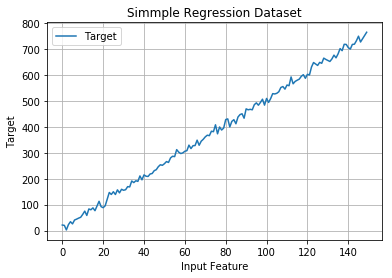

In [7]:
plt.plot(df.x, df.y, label='Target')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Simmple Regression Dataset')
plt.show()

### Load Training and Validation Datasets

In [8]:
train_file = 'linearTrain.csv'
validation_file = 'linearValidation.csv'

# Specify the column names, since the files do not have headers
df_train = pd.read_csv(train_file, names=['y','x'])
df_validation = pd.read_csv(validation_file, names=['y','x'])

In [9]:
df_train.head() # data check

,y,x
0,446.933412,87
1,558.291927,111
2,62.330262,10
3,465.445440,91
4,251.525797,49


In [10]:
df_validation.head()

,y,x
0,446.933412,87
1,558.291927,111
2,62.330262,10
3,465.445440,91
4,251.525797,49


### Plot the datasets

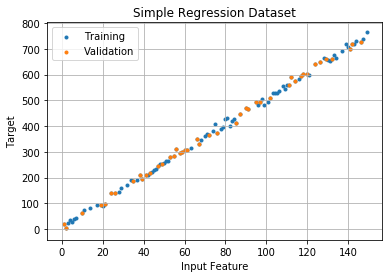

In [11]:
plt.scatter(df_train.x, df_train.y, label='Training', marker='.')
plt.scatter(df_validation.x, df_validation.y, label='Validation', marker='.')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.title('Simple Regression Dataset')
plt.legend()
plt.show()

### Separating Features and Targets for Training and Validation
This is in preparation for use in XGBoost's regressor
*Note: Remember that Python indices start at 0*

In [12]:
X_train = df_train.iloc[:,1:] # Features pull from 2nd column to the end
y_train = df_train.iloc[:,0].ravel() # Target: 1st Column (0th) Recall: ravel to flatten array

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

## Build the XGBoosst Regressor model

Below cells will set up the training instance, set the hyperparameters, and then fit the model to the training data.

Find Distributed (Deep) Machine Learning Community's XGBoost Training Parameter Reference [here](https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst)

In this project, I updated the following parameters:
```reg:squarederror``` as ```reg:linear``` is deprecated.


In [13]:
# Create regressor
regressor = xgb.XGBRegressor(objective='reg:squarederror')

In [17]:
regressor # display hyperparameters. Note: This will display at the end of the training model process, as well.

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

### Training the model

In [15]:
# Provide the Training and Validations Datasets
# XGBoost will report the training and validation errors
# While training, the errors should trend downwards
regressor.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:400.352	validation_1-rmse:390.098
[1]	validation_0-rmse:362.272	validation_1-rmse:352.632
[2]	validation_0-rmse:327.886	validation_1-rmse:317.933
[3]	validation_0-rmse:296.839	validation_1-rmse:287.009
[4]	validation_0-rmse:268.687	validation_1-rmse:258.65
[5]	validation_0-rmse:243.265	validation_1-rmse:233.332
[6]	validation_0-rmse:220.268	validation_1-rmse:210.579
[7]	validation_0-rmse:199.476	validation_1-rmse:190.388
[8]	validation_0-rmse:180.674	validation_1-rmse:172.091
[9]	validation_0-rmse:163.678	validation_1-rmse:155.571
[10]	validation_0-rmse:148.316	validation_1-rmse:140.75
[11]	validation_0-rmse:134.421	validation_1-rmse:127.193
[12]	validation_0-rmse:121.85	validation_1-rmse:115.144
[13]	validation_0-rmse:110.489	validation_1-rmse:104.024
[14]	validation_0-rmse:100.183	validation_1-rmse:94.2988
[15]	validation_0-rmse:90.8624	validation_1-rmse:85.4025
[16]	validation_0-rmse:82.4277	validation_1-rmse:77.3111
[17]	validation_0-rmse:74.8073	validation_1-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

From the model's result, one can see that the training *rmse* trends downward as the model improves.

### Plotting the Errors
First, pull the Training RMSE and Evaluation RMSE values

In [25]:
eval_result = regressor.evals_result()

In [ ]:
eval_result # display results in a new format

In [28]:
training_rounds = range(len(eval_result['validation_0']['rmse'])) # x-axis data

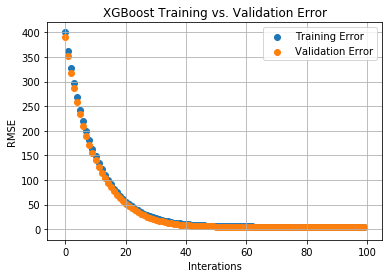

In [29]:
### Graph
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Interations')
plt.ylabel('RMSE')
plt.title('XGBoost Training vs. Validation Error')
plt.legend()
plt.show()

### XGBoost Feature Importance
*plot_importance* function shows which features were usefule in the model's operation.

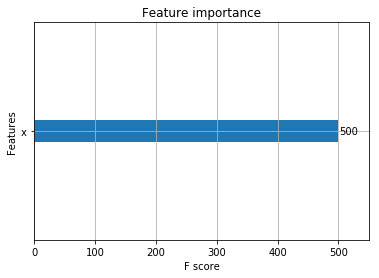

In [31]:
xgb.plot_importance(regressor) # To find which features were useful in the model
plt.show()

In this case, *x* was the only feature. This become more interesting with more complex models.

## Validation Dataset: Compare Actual and Predicted
This section focused on evaluating the performance of the model.

In [37]:
result=regressor.predict(X_validation) # predicted results for plotting

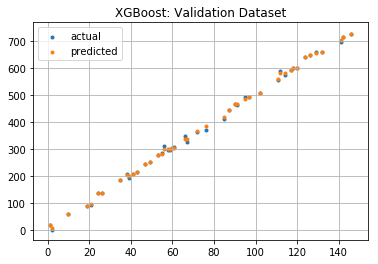

In [38]:
plt.scatter(df_validation.x, df_validation.y, label='actual', marker='.')
plt.scatter(df_validation.x, result, label='predicted', marker='.')
plt.grid(True)
plt.legend()
plt.title('XGBoost: Validation Dataset')
plt.show()

### XGBoost Metrics
Calculate the *mean squared error* and *root mean squared error*.
Reminder: RMSE is the standard deviation of the residuals (prediction errors), or how well that predicted data concentrated around the line of best fit.

In [42]:
# Display the Root Mean Square Error (RMSE) Metrics
print('XGBoost Algorithm Metrics')
mse = mean_squared_error(df_validation.y,result)
print(' Mean Squared Error: {0: .2f}'.format(mse))
print(' Root Mean Squared Error: {0: .2f}'.format(mse**.5))

XGBoost Algorithm Metrics
 Mean Squared Error:  20.57
 Root Mean Squared Error:  4.54


### XGboost Residual Histogram

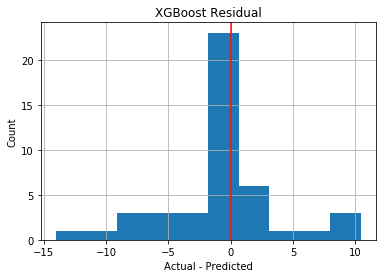

In [43]:
# Training Data Residuals
residuals = df_validation.y - result
plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('XGBoost Residual')
plt.axvline(color='r') # overall center of data deviations
plt.show()

### XGBoost Plot Predicted vs. Actual Targets

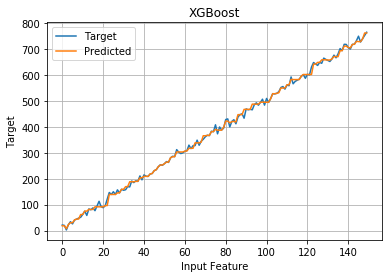

In [44]:
# Plot the dataset
plt.plot(df.x, df.y, label='Target')
plt.plot(df.x, regressor.predict(df[['x']]), label='Predicted')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('XGBoost')
plt.show()

The plots are nearly identical. This is a great performance.

## Linear Regression Algorithm
This section will set up *sklearn's* linear regression for comparison to XGBoost.

In [45]:
linear_regressor = LinearRegression() # from sklearn

In [46]:
linear_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Compare Weights Assigned by Linear Regression
Using the original function: _5*x + 8 + noise_
Below will show the following weights:
* coeffecient(s) -> coef_
* intercept -> intercept_

In [48]:
linear_regressor.coef_ # Do not forget underscore '_' at the end. 
# This will estimate the coefficient for the linear regression plot

array([4.99917797])

Notice that the array value is very close to the actual coefficient *5*.

In [49]:
linear_regressor.intercept_

7.7229154204349015

Notice that the array value is very close to the actual coefficient *8*.

In [50]:
linear_result = linear_regressor.predict(df_validation[['x']])

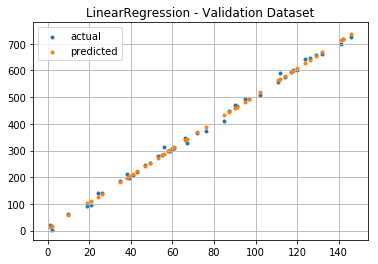

In [51]:
plt.scatter(df_validation.x,df_validation.y,label='actual',marker='.')
plt.scatter(df_validation.x,linear_result,label='predicted',marker='.')
plt.grid(True)
plt.title('LinearRegression - Validation Dataset')
plt.legend()
plt.show()

The plot shows where the line expected to be drawn.

### Linear Regression Metrics
Calculate the *mean squared error* and *root mean squared error*.

In [52]:
# Display the Root Mean Square Error (RMSE) Metrics
print('Linear Regression Algorithm Metrics')
mse = mean_squared_error(df_validation.y,linear_result)
print(' Mean Squared Error: {0: .2f}'.format(mse))
print(' Root Mean Squared Error: {0: .2f}'.format(mse**.5))

Linear Regression Algorithm Metrics
 Mean Squared Error:  98.88
 Root Mean Squared Error:  9.94


### Linear Regression Residual Histogram

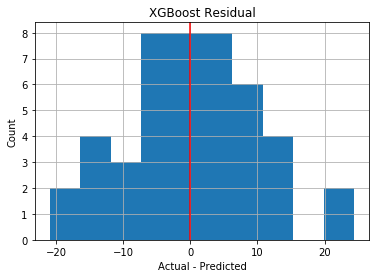

In [53]:
# Training Data Residuals
residuals = df_validation.y - linear_result
plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('XGBoost Residual')
plt.axvline(color='r') # overall center of data deviations
plt.show()

Linear Regression in this case performed better than XGBoost.

### Linear Plot Predicted vs. Actual Targets

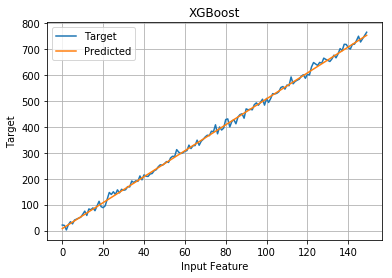

In [54]:
# Plot the dataset
plt.plot(df.x, df.y, label='Target')
plt.plot(df.x, linear_regressor.predict(df[['x']]), label='Predicted')
plt.grid(True)
plt.xlabel('Input Feature')
plt.ylabel('Target')
plt.legend()
plt.title('XGBoost')
plt.show()

## Input Features - Outside of Range Used for Training
* XGBoost Prediction has an upper and lower bound (directly applies to tree-based algorithms)
* Linear Regression extrapolates

In [55]:
# Revist the function
def straight_line(x):
    return 5*x+8

### X is outside the training samples' range

In [101]:
X = np.array([-100,-5,0.5,1,1.9,5,29,49,160,1000,5000])
y = straight_line(X)

df_IF = pd.DataFrame({'x':X,'y':y})
df_IF['xgboost']=regressor.predict(df_IF[['x']])
df_IF['linear']=linear_regressor.predict(df_IF[['x']])

In [102]:
df_IF # display values

,x,y,xgboost,linear
0,-100.0,-492.0,18.386923,-492.194882
1,-5.0,-17.0,18.386923,-17.272974
2,0.5,10.5,18.386923,10.222504
3,1.0,13.0,18.386923,12.722093
4,1.9,17.5,7.404528,17.221354
5,5.0,33.0,30.329878,32.718805
6,29.0,153.0,159.193268,152.699077
7,49.0,253.0,252.636932,252.682636
8,160.0,808.0,761.303406,807.591391
9,1000.0,5008.0,761.303406,5006.900890


* XGBoost have caps for upper and lower bounds, not reach the extent of *y*, due to being designed to be memory efficient. The *upper* bound is set to *X=149* and *lower* bound to *X=1*, as default, due to regressor being configured to ```reg:squarederror```.
* Linear followed the *y* values nearly identically

### Visualize the Outside of Range

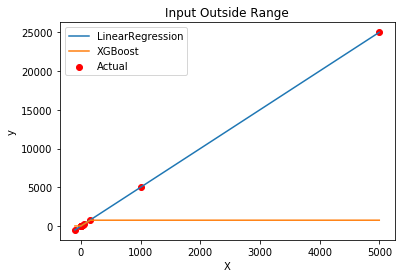

In [103]:
# XGBoost Predictions: upper and lower bounds
# Linear Regression: extrapolation
plt.scatter(df_IF.x, df_IF.y, label='Actual',color='red')
plt.plot(df_IF.x,df_IF.linear,label='LinearRegression')
plt.plot(df_IF.x,df_IF.xgboost,label='XGBoost')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Input Outside Range')
plt.show()

Here, the straight horizontal shows where XGBoost bounded.

Red dots are the 'ground truth.'


### X is Inside the training samples' range

In [104]:
X = np.array([1,3,5,7,89,110,125,149]) # Values changed
y = straight_line(X)

df_IF = pd.DataFrame({'x':X,'y':y})
df_IF['xgboost']=regressor.predict(df_IF[['x']])
df_IF['linear']=linear_regressor.predict(df_IF[['x']])

In [105]:
df_IF # display values

,x,y,xgboost,linear
0,1,13,18.386923,12.722093
1,3,23,23.258354,22.720449
2,5,33,30.329878,32.718805
3,7,43,44.401634,42.717161
4,89,453,467.098206,452.649755
5,110,558,561.956421,557.632493
6,125,633,648.190186,632.620162
7,149,753,761.303406,752.600434


* XGBoost and Linear followed the *y* values closer.

### Visualize the Inside of Range

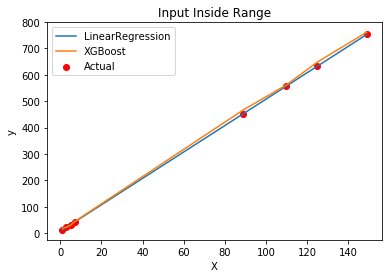

In [107]:
# XGBoost Predictions: upper and lower bounds
# Linear Regression: extrapolation
plt.scatter(df_IF.x, df_IF.y, label='Actual',color='red')
plt.plot(df_IF.x,df_IF.linear,label='LinearRegression')
plt.plot(df_IF.x,df_IF.xgboost,label='XGBoost')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Input Inside Range')
plt.show()

Here, there is no straight horizontal for XGBoost bound, due to inputs inside being in its range.

Red dots are the 'ground truth.'

The reason for XGBoost's bounding is to concentrate on decision tree-like operations. Many times, the branches do not need wide array of values to make the decision.

## Summary
1. Updated core installation tools
1. Checked for required libraries
1. Installed `xgboost` for local mode
1. Built training and validation datasets
1. Built `xgboost` Regressor
1. Built *Linear Regression* care of `sklearn`
1. Explored performance 'Out of Range' and 'In Range' Inputs with *XGBoost* and *Linear Regression*